This CSV file contains historical stock data for Tata Motors Limited (TATAMOTORS) on NSE from January 1995 to August 2025. It includes daily OHLCV (Open, High, Low, Close, Volume, Turnover) data along with technical indicators such as:

Daily_Return_% – daily percentage change in closing price

Cumulative_Return_% – cumulative return over time

MA_20 – 20-day moving average of closing price

MA_50 – 50-day moving average of closing price

The dataset is cleaned, sorted by date, and ready for analysis, forecasting, or backtesting trading strategies.

In [100]:
#importing necessary modules
import numpy as mp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [101]:
df=pd.read_csv("/content/TATAMOTORS_NSE_1995-2025.csv")

In [102]:
df.size

117060

In [103]:
df.head()

,Unnamed: 0,Date,Symbol,Open,High,Low,Close,PrevClose,Volume,Turnover,VWAP,Trades,Daily_Return_%,MA_20,MA_50
0,223,1995-01-02,TATAMOTORS,517.5,524.7,517.5,524.2,522.0,1100,573530.0,521.39,NaN,0.421456,NaN,NaN
1,224,1995-01-03,TATAMOTORS,518.0,520.0,515.0,515.0,524.2,1500,775450.0,516.97,NaN,-1.755055,NaN,NaN
2,225,1995-01-04,TATAMOTORS,515.0,515.0,515.0,515.0,515.0,300,154500.0,515.00,NaN,0.000000,NaN,NaN
3,226,1995-01-05,TATAMOTORS,480.0,480.0,480.0,480.0,515.0,50,24000.0,480.00,NaN,-6.796117,NaN,NaN
4,227,1995-01-06,TATAMOTORS,495.0,501.0,495.0,498.7,480.0,200,99550.0,497.75,NaN,3.895833,NaN,NaN


In [104]:
#drop unnamed:0 column
df.drop(columns=['Unnamed: 0'],inplace=True)

In [105]:
df.head()

,Date,Symbol,Open,High,Low,Close,PrevClose,Volume,Turnover,VWAP,Trades,Daily_Return_%,MA_20,MA_50
0,1995-01-02,TATAMOTORS,517.5,524.7,517.5,524.2,522.0,1100,573530.0,521.39,NaN,0.421456,NaN,NaN
1,1995-01-03,TATAMOTORS,518.0,520.0,515.0,515.0,524.2,1500,775450.0,516.97,NaN,-1.755055,NaN,NaN
2,1995-01-04,TATAMOTORS,515.0,515.0,515.0,515.0,515.0,300,154500.0,515.00,NaN,0.000000,NaN,NaN
3,1995-01-05,TATAMOTORS,480.0,480.0,480.0,480.0,515.0,50,24000.0,480.00,NaN,-6.796117,NaN,NaN
4,1995-01-06,TATAMOTORS,495.0,501.0,495.0,498.7,480.0,200,99550.0,497.75,NaN,3.895833,NaN,NaN


In [106]:
df.columns

Index(['Date', 'Symbol', 'Open', 'High', 'Low', 'Close', 'PrevClose', 'Volume',
       'Turnover', 'VWAP', 'Trades', 'Daily_Return_%', 'MA_20', 'MA_50'],
      dtype='object')

In [107]:
df.dtypes

,0
Date,object
Symbol,object
Open,float64
High,float64
Low,float64
Close,float64
PrevClose,float64
Volume,int64
Turnover,float64
VWAP,float64


In [108]:
# we need to convert Date from object datatype to DateTime
df['Date']=pd.to_datetime(df['Date'],errors='coerce')

In [109]:
df.dtypes

,0
Date,datetime64[ns]
Symbol,object
Open,float64
High,float64
Low,float64
Close,float64
PrevClose,float64
Volume,int64
Turnover,float64
VWAP,float64


# Exploratory Data Analysis

In [110]:
df.describe()

,Date,Open,High,Low,Close,PrevClose,Volume,Turnover,VWAP,Trades,Daily_Return_%,MA_20,MA_50
count,7804,7804.000000,7804.000000,7804.000000,7804.000000,7804.000000,7.804000e+03,7.804000e+03,7804.000000,3.617000e+03,7804.000000,7785.000000,7755.000000
mean,2010-04-22 09:00:49.820604928,426.908105,433.624885,419.198526,426.156516,426.042984,1.008443e+07,3.360758e+09,426.517865,1.641804e+05,inf,425.784914,425.176591
min,1995-01-02 00:00:00,58.000000,60.700000,57.550000,58.800000,0.000000,5.000000e+01,2.400000e+04,59.240000,3.434000e+03,-80.866780,64.885000,69.538000
25%,2002-08-27 18:00:00,215.950000,220.187500,209.437500,215.375000,215.375000,1.365342e+06,4.126361e+08,215.487500,8.477600e+04,-1.418222,215.867500,219.790000
50%,2010-04-24 12:00:00,399.000000,404.525000,392.175000,397.800000,397.800000,4.114132e+06,1.913436e+09,398.320000,1.263780e+05,0.013436,398.915000,401.483000
75%,2017-12-23 00:00:00,535.000000,544.000000,526.262500,535.312500,535.312500,9.874223e+06,3.942626e+09,535.530000,1.993340e+05,1.490380,533.560000,525.136500
max,2025-08-19 00:00:00,1361.000000,1382.000000,1347.000000,1365.150000,1365.150000,3.905778e+08,9.853175e+10,1362.150000,1.517162e+06,inf,1316.080000,1270.157000
std,NaN,260.410952,263.730360,256.249596,259.926045,259.923227,1.998049e+07,5.490162e+09,259.954308,1.309842e+05,NaN,258.907945,257.163936


In [111]:
df.isnull().sum()

,0
Date,0
Symbol,0
Open,0
High,0
Low,0
Close,0
PrevClose,0
Volume,0
Turnover,0
VWAP,0


In [112]:
# Fill missing Trades with median value
df['Trades'] = df['Trades'].fillna(df['Trades'].median())
df['MA_20'] = df['MA_20'].fillna(df['MA_20'].median())
df['MA_50'] = df['MA_50'].fillna(df['MA_50'].median())

In [113]:
df.isnull().sum()

,0
Date,0
Symbol,0
Open,0
High,0
Low,0
Close,0
PrevClose,0
Volume,0
Turnover,0
VWAP,0


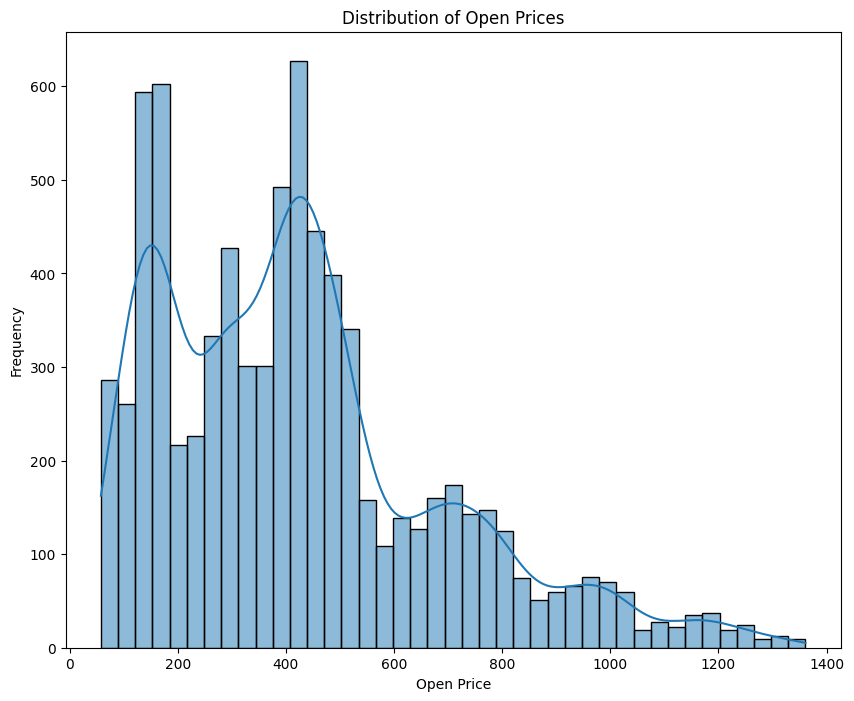

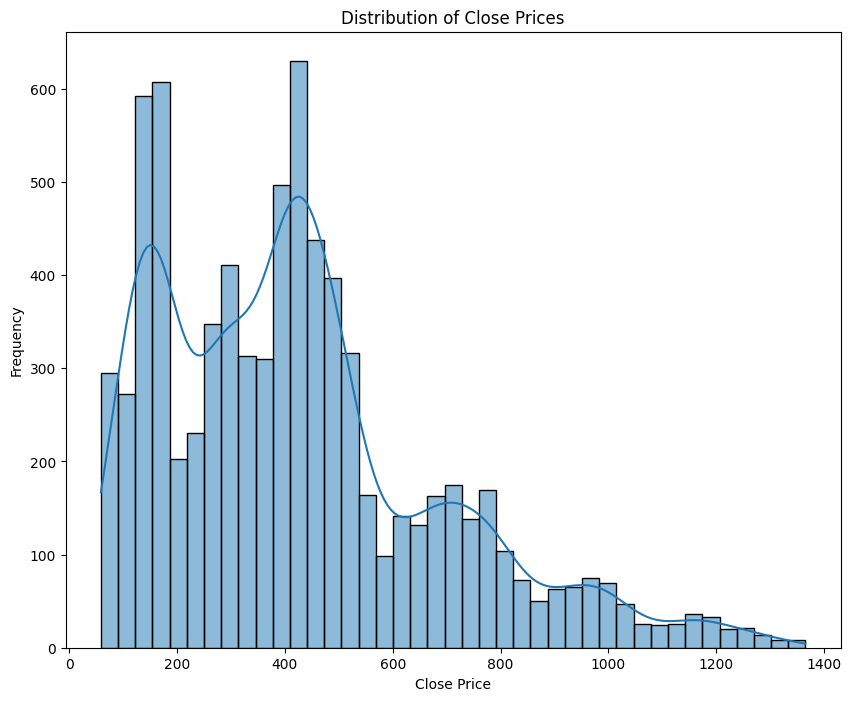

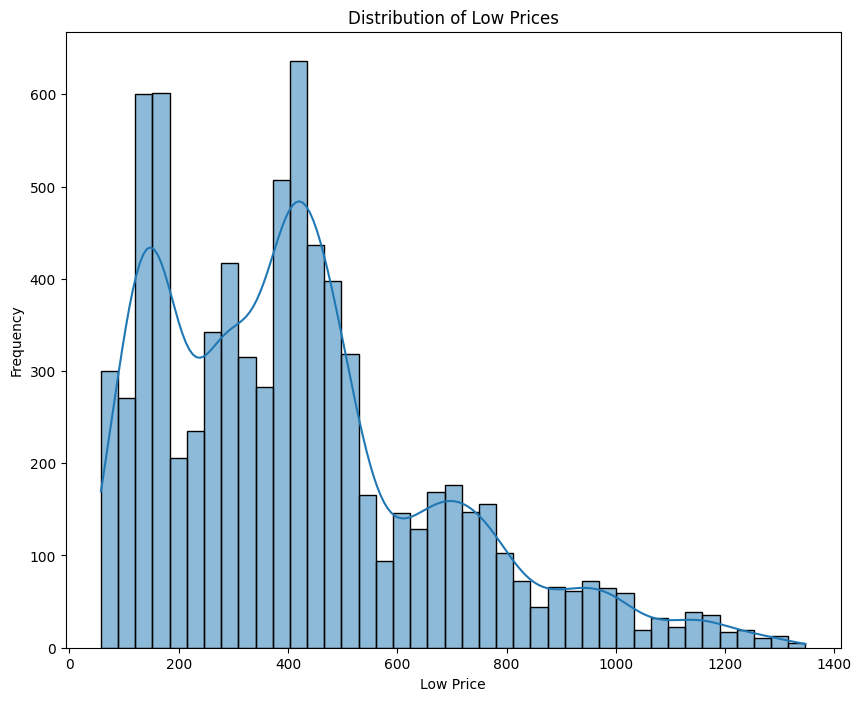

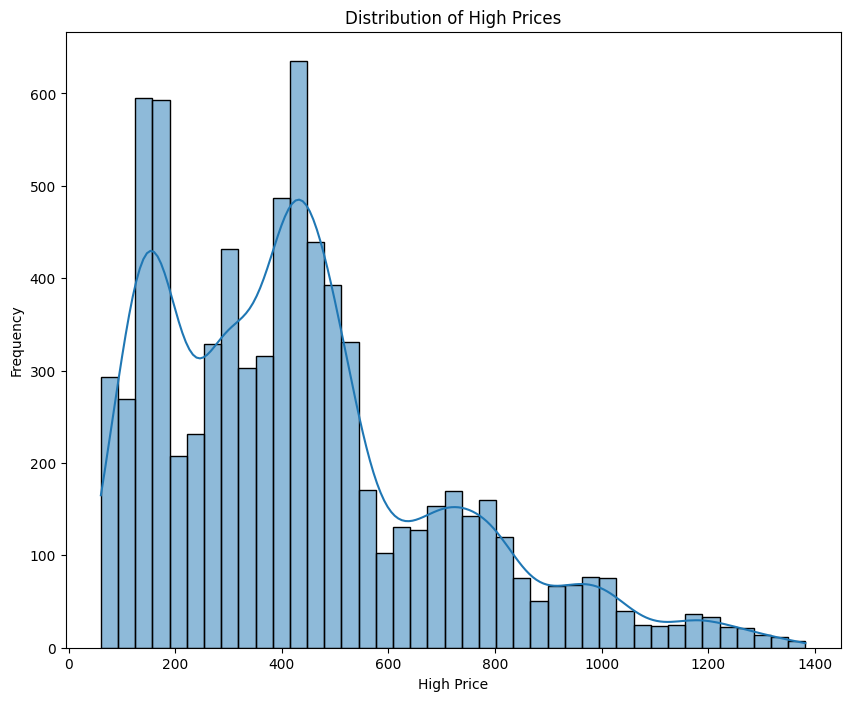

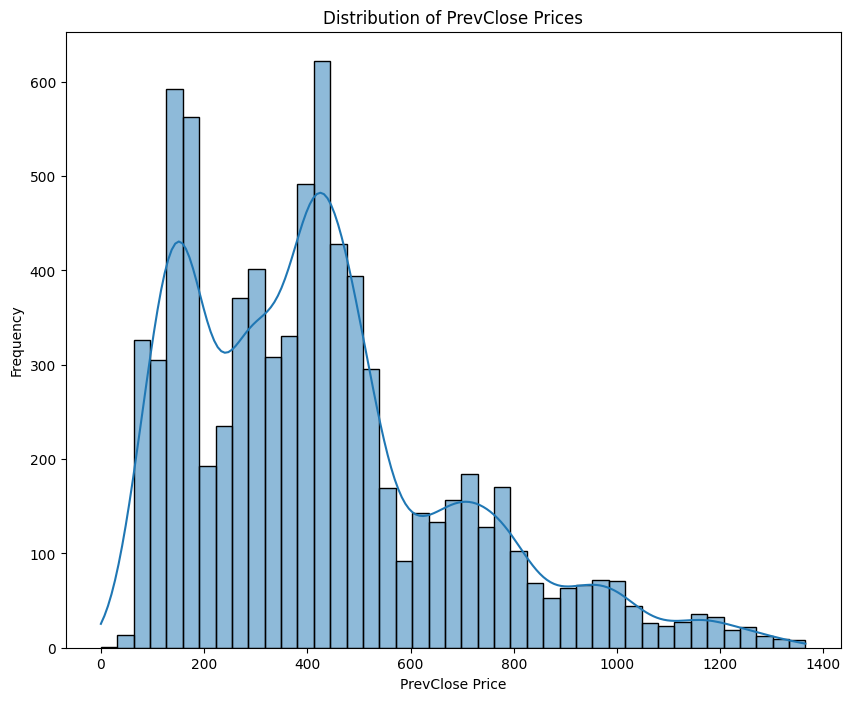

In [114]:
# Histogram for the Open,High,low,close prices
arr=['Open','Close','Low','High','PrevClose']
for a in arr:
    plt.figure(figsize=(10, 8))
    sns.histplot(df[a], kde=True)
    plt.title(f'Distribution of {a} Prices')
    plt.xlabel(f"{a} Price")
    plt.ylabel('Frequency')
    plt.show()
    print("\n")

It is shown that Open,Close,Low,High follows similar kind of distribution

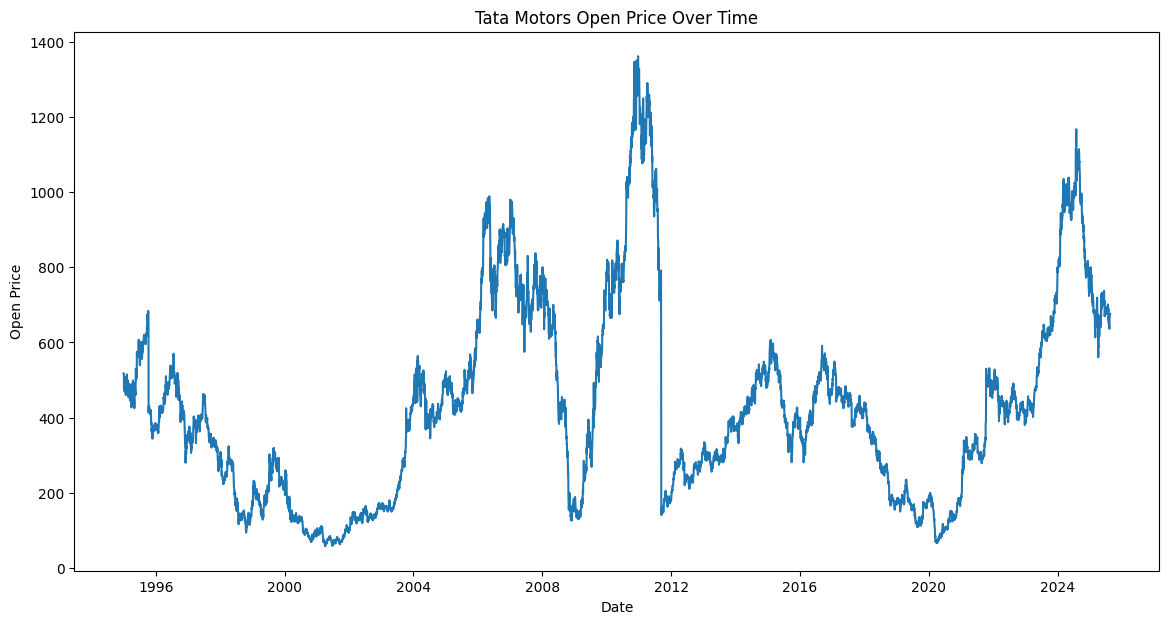

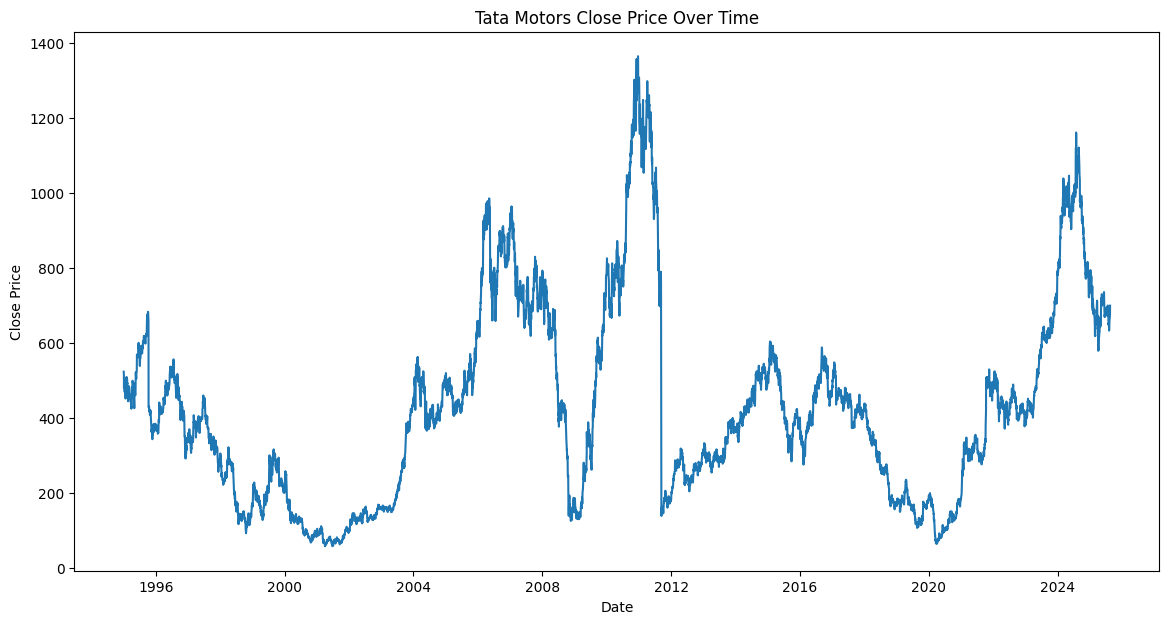

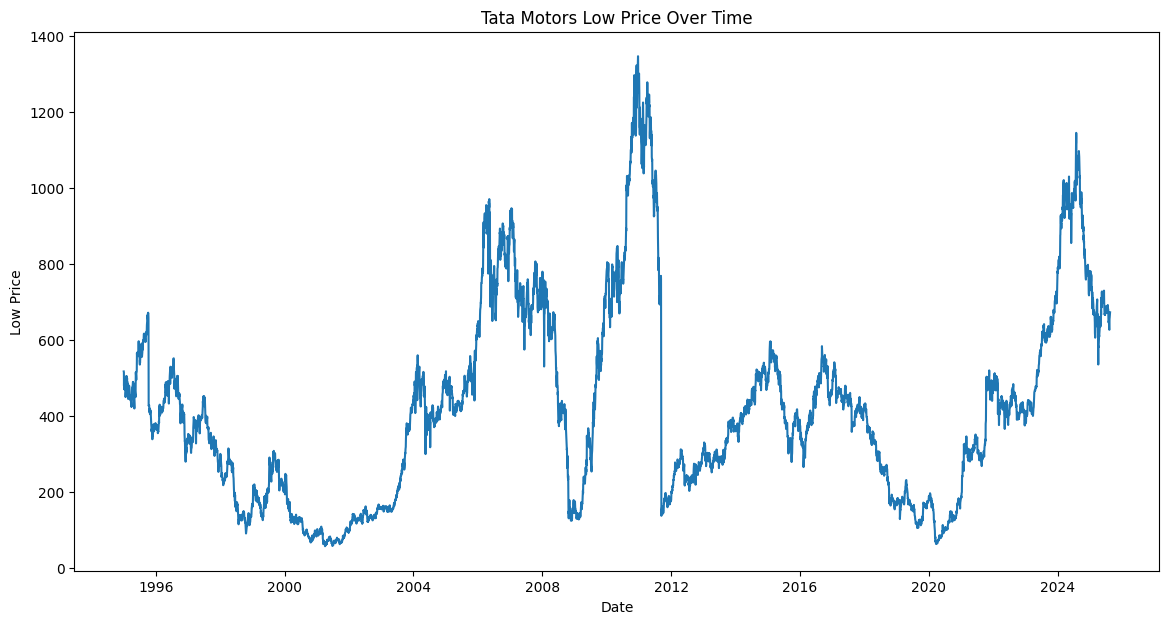

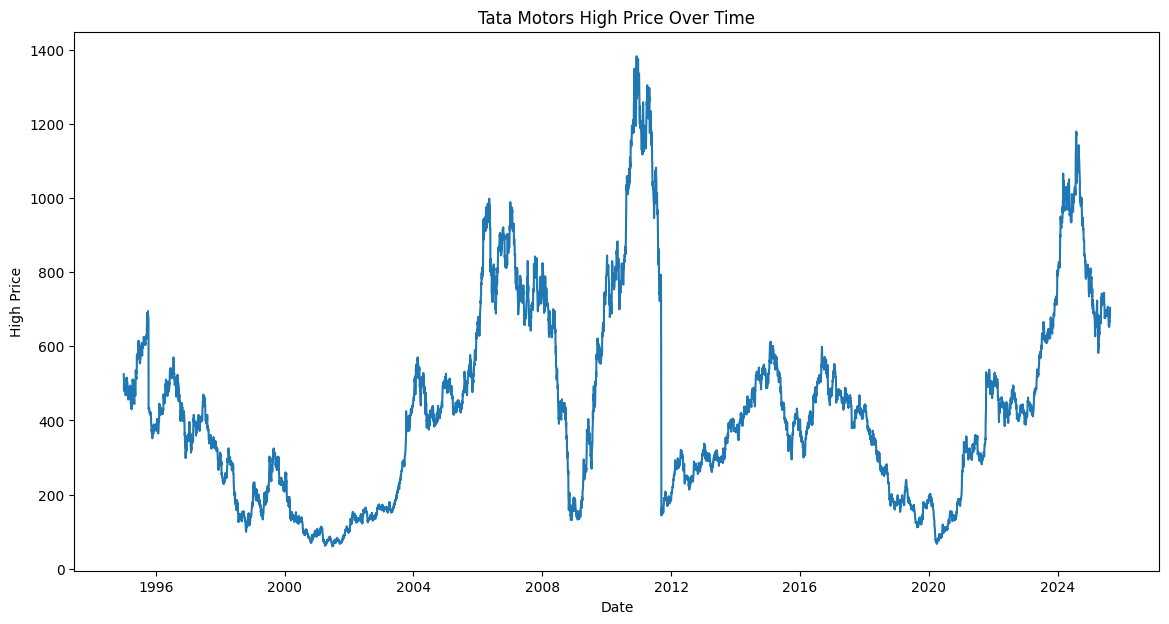

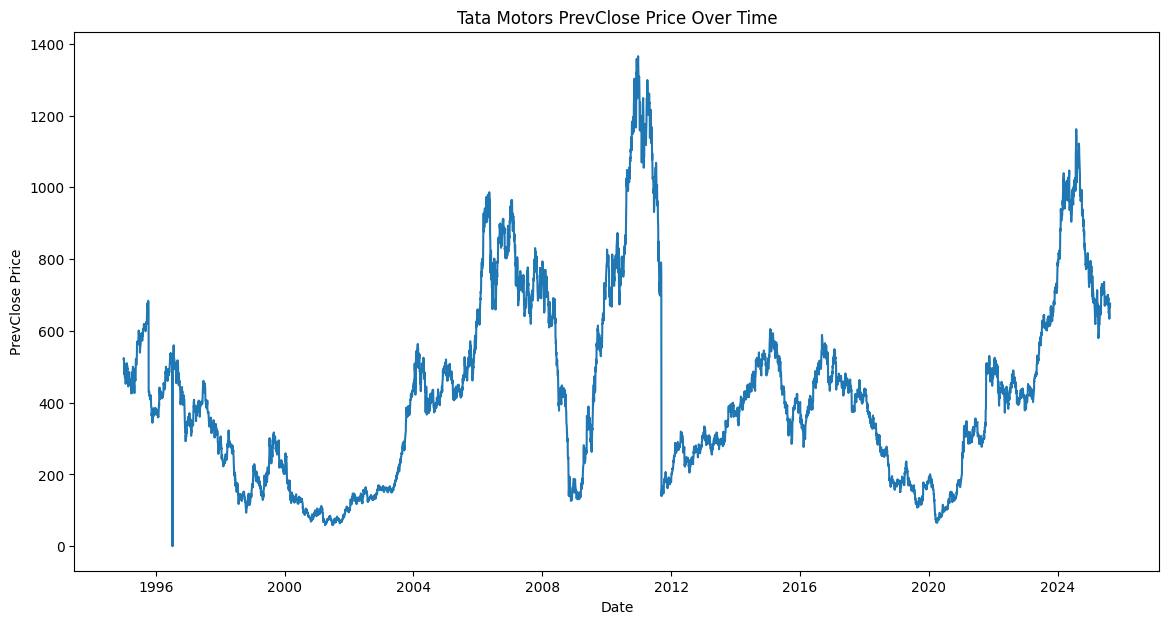

In [115]:
# Time Series Plot for Open, High, Low, Close Price over years
arr=['Open','Close','Low','High','PrevClose']
data=df.sort_values('Date')
for a in arr:
    plt.figure(figsize=(14, 7))
    sns.lineplot(x='Date', y=a, data=data)
    plt.title(f'Tata Motors {a} Price Over Time')
    plt.xlabel('Date')
    plt.ylabel(f'{a} Price')
    plt.show()

                    Open      High       Low     Close  PrevClose    Volume  \
Open            1.000000  0.999562  0.999396  0.999109   0.999009 -0.182193   
High            0.999562  1.000000  0.999272  0.999605   0.998745 -0.179688   
Low             0.999396  0.999272  1.000000  0.999553   0.998504 -0.182901   
Close           0.999109  0.999605  0.999553  1.000000   0.998335 -0.180607   
PrevClose       0.999009  0.998745  0.998504  0.998335   1.000000 -0.182716   
Volume         -0.182193 -0.179688 -0.182901 -0.180607  -0.182716  1.000000   
Turnover        0.137173  0.140232  0.136580  0.139185   0.136211  0.801482   
VWAP            0.999490  0.999787  0.999711  0.999858   0.998714 -0.181084   
Trades          0.080595  0.083037  0.077869  0.080430   0.080476  0.720179   
Daily_Return_% -0.008437  0.005174  0.006829  0.018268  -0.025179  0.091408   
MA_20           0.992061  0.991979  0.991348  0.991414   0.992401 -0.189459   
MA_50           0.975137  0.975050  0.974267  0.9743

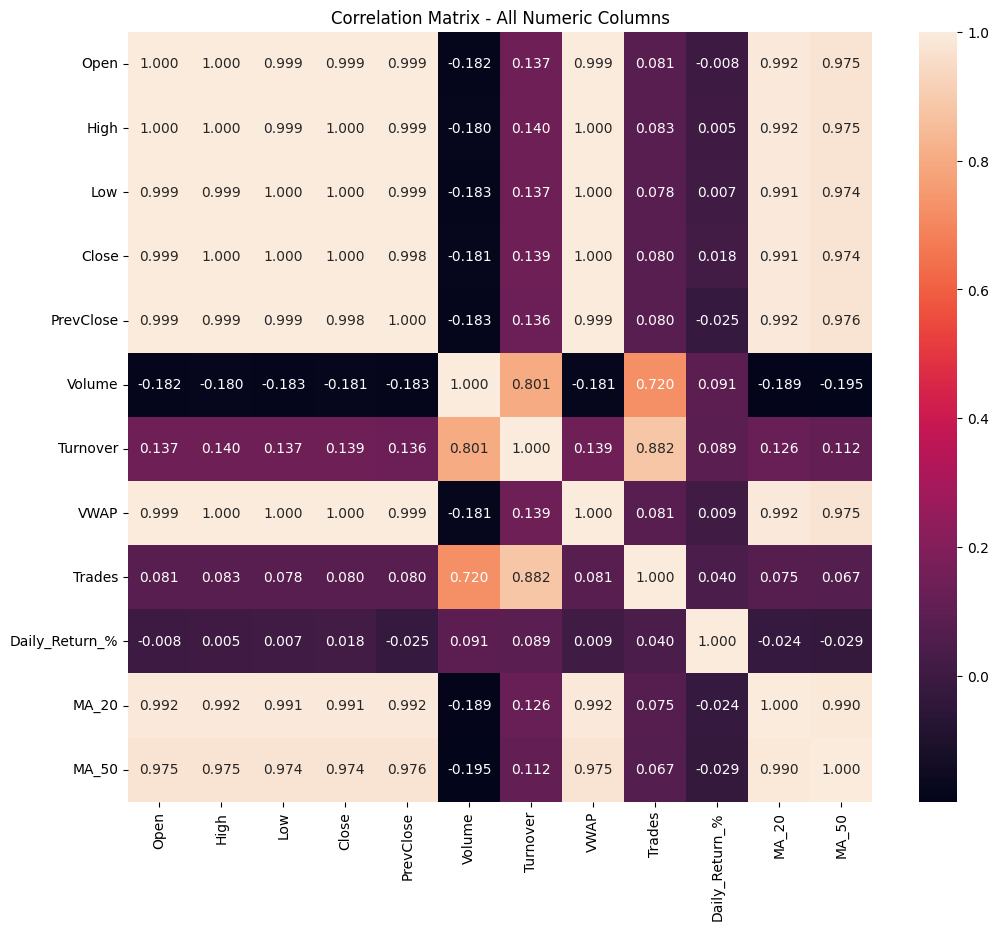

In [116]:
#including only number dtype columns
numeric_df = df.select_dtypes(include=['number'])

#correlation matrix
print(numeric_df.corr())

# Step 4: Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".3f")
plt.title("Correlation Matrix - All Numeric Columns")
plt.show()

All the prices are highly correlated,

MA_20 and MA_50 are also highly correlated

thus we dont include all highly correlated columns in our model prediction as it will tend to overfit

## Feature Selection

In [117]:
features = ['Open', 'High', 'Low', 'VWAP', 'Trades', 'Turnover', 'MA_50']
X = df[features]
y = df['Close']

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training

In [129]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.4 MB/s eta 0:00:00


In [130]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [131]:
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'DecisionTree': DecisionTreeRegressor(max_depth=10, random_state=42),
    'LightGBM': LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'CatBoost': CatBoostRegressor(verbose=0, random_state=42)


}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f"======== {name} ============")
    print("R squared is: ",r2)
    print("Mean squared error is: ",mse)


    results.append({
        'Model': name,
        'R2_Score': r2,
        'MSE': mse,
        'ModelObject': model
    })
results_df = pd.DataFrame(results).sort_values(by='R2_Score', ascending=False)

best_model_row = results_df.iloc[0]
best_model_name = best_model_row['Model']
best_model = best_model_row['ModelObject']

print("Best Model:")
print(results_df.head(1))

======== LinearRegression ============
R squared is:  0.9997894808577386
Mean squared error is:  14.105071625803216
======== Ridge ============
R squared is:  0.9997894807787006
Mean squared error is:  14.105076921459775
======== Lasso ============
R squared is:  0.9993929872646292
Mean squared error is:  40.670686846837434
======== RandomForest ============
R squared is:  0.9997071684937285
Mean squared error is:  19.6201130494875
======== XGBoost ============
R squared is:  0.999591627908883
Mean squared error is:  27.361490899629473
======== DecisionTree ============
R squared is:  0.9995979229533013
Mean squared error is:  26.939714278970474
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001249 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 6243, number of used features: 7
[LightGBM] [Info] Start training from score 426.247661
====

### *Best Model is LinearRegression with R2 score 0.999789*

In [132]:
import joblib
joblib.dump(best_model, f"{best_model_name}_best_model.pkl")
print(f"Saved best model as: {best_model_name}_best_model.pkl")

Saved best model as: LinearRegression_best_model.pkl
